In [60]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [61]:
# Variables Globales
PATH = os.getcwd()
AUX_FOLDER = 'aux_file'
INPUT_FILENAME = 'dataset_validado.xlsx'
OUTPUT_FILENAME_TRAIN = 'dataset_train.xlsx'
OUTPUT_FILENAME_TEST = 'dataset_test.xlsx'

In [62]:
# Cargo los datos
df = pd.read_excel(os.path.join(PATH, AUX_FOLDER, INPUT_FILENAME))

In [63]:
df.head()

,Fecha,Area,Habitaciones,Antiguedad,Precio
0,2019-01-19,112,4,68,266799.352789
1,2008-01-27,73,3,69,134218.332321
2,2004-03-20,155,1,24,435912.549847
3,2019-09-02,189,5,69,506809.606406
4,2015-05-27,168,2,92,343097.223933


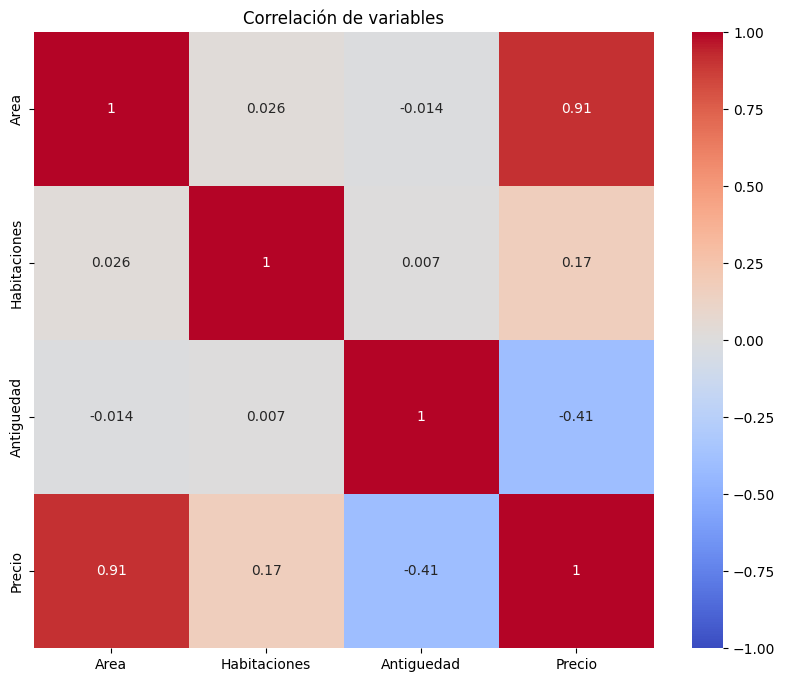

In [64]:
# Calcular la matriz de correlación
corr_matrix = df.drop('Fecha', axis=1).corr()

# Crear el gráfico de correlación tipo heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Configurar el título y mostrar el gráfico
plt.title('Correlación de variables')
plt.show()

In [65]:
# Preprocesamiento
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month
df['Dia'] = df['Fecha'].dt.day
df.drop('Fecha', axis=1, inplace=True)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
df = df.loc[:, ['Area', 'Habitaciones', 'Antiguedad', 'Precio']]
df_train, df_test = train_test_split(df, test_size=0.3)

# Escalamiento de variables
scaler = StandardScaler()

train_scaled = scaler.fit_transform(df_train)
df_train_scaled = pd.DataFrame(train_scaled, columns=['Area', 'Habitaciones', 'Antiguedad', 'Precio'])

test_scaled = scaler.transform(df_test)
df_test_scaled = pd.DataFrame(test_scaled, columns=['Area', 'Habitaciones', 'Antiguedad', 'Precio'])

In [66]:
df_train_scaled.head()

,Area,Habitaciones,Antiguedad,Precio
0,1.515054,-0.841907,-0.353700,1.379648
1,-0.208110,0.606090,-0.045922,-0.056052
2,0.816474,-0.117908,1.561361,0.041376
3,1.305480,0.606090,-1.208638,1.800348
4,-0.534115,-0.841907,1.424571,-1.167770


In [67]:
df_test_scaled.head()

,Area,Habitaciones,Antiguedad,Precio
0,-1.558699,-0.841907,-1.106045,-1.070079
1,1.328766,-1.565906,0.364448,0.798441
2,1.491768,-0.117908,-1.584811,1.983555
3,-1.349125,-0.841907,1.732348,-2.033628
4,-1.698415,-0.117908,-0.251107,-1.384222


In [68]:
media = scaler.mean_
desv_estandar = scaler.scale_
df_scaler = pd.DataFrame({'Media':media, 'STD': desv_estandar})

In [69]:
df_train_scaled.to_excel(os.path.join(PATH, AUX_FOLDER, OUTPUT_FILENAME_TRAIN), index=False)
df_test_scaled.to_excel(os.path.join(PATH, AUX_FOLDER, OUTPUT_FILENAME_TEST), index=False)
df_scaler.to_excel(os.path.join(PATH, AUX_FOLDER, 'scaler.xlsx'), index=False)